<a href="https://colab.research.google.com/github/JasonIsCrackedAtFortnite/Don-t-let-the-OPS-know-when-I-give-them-a-mushroom/blob/main/Don't_let_the_ops_know.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!unzip dontletopsC.zip

Archive:  dontletopsC.zip
replace mushroom_cleaned.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, roc_auc_score

In [3]:
data = pd.read_csv('mushroom_cleaned.csv')

In [16]:
data['cap-cicumfrance'] = data['cap-diameter']*3.1415926535

In [25]:
data['stem-volume']=data['stem-width']*data['stem-width']*data['stem-height']

In [18]:
radius=data['cap-diameter']/2

In [19]:
data['cap-area']=radius*radius*3.1415926535

In [20]:
data.sample(40)

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class,cap-cicumfrance,cap-area
26933,739,5,1,10,0.621148,1222,3,0.943195,1,2321.636971,4.289224e+05
44279,1115,6,4,6,1.014216,2473,12,0.888450,1,3502.875809,9.764266e+05
13230,578,6,0,5,0.103879,420,3,0.888450,0,1815.840554,2.623890e+05
9281,401,0,0,3,0.242293,355,3,1.804273,0,1259.778654,1.262928e+05
9544,194,0,0,3,0.171522,179,3,0.943195,1,609.468975,2.955925e+04
50546,537,3,0,10,2.013794,0,2,0.888450,1,1687.035255,2.264845e+05
321,818,6,2,10,0.866994,1559,11,0.943195,1,2569.822791,5.255288e+05
44209,579,6,4,11,0.421347,1399,12,0.888450,0,1818.982146,2.632977e+05
2377,401,6,2,10,1.993048,1081,6,0.943195,0,1259.778654,1.262928e+05
30755,326,6,5,7,0.764392,251,6,0.888450,1,1024.159205,8.346898e+04


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
 9   cap-cicumfrance  54035 non-null  float64
 10  cap-area         54035 non-null  float64
dtypes: float64(4), int64(7)
memory usage: 4.5 MB


In [22]:
data.isna().sum()

cap-diameter       0
cap-shape          0
gill-attachment    0
gill-color         0
stem-height        0
stem-width         0
stem-color         0
season             0
class              0
cap-cicumfrance    0
cap-area           0
dtype: int64

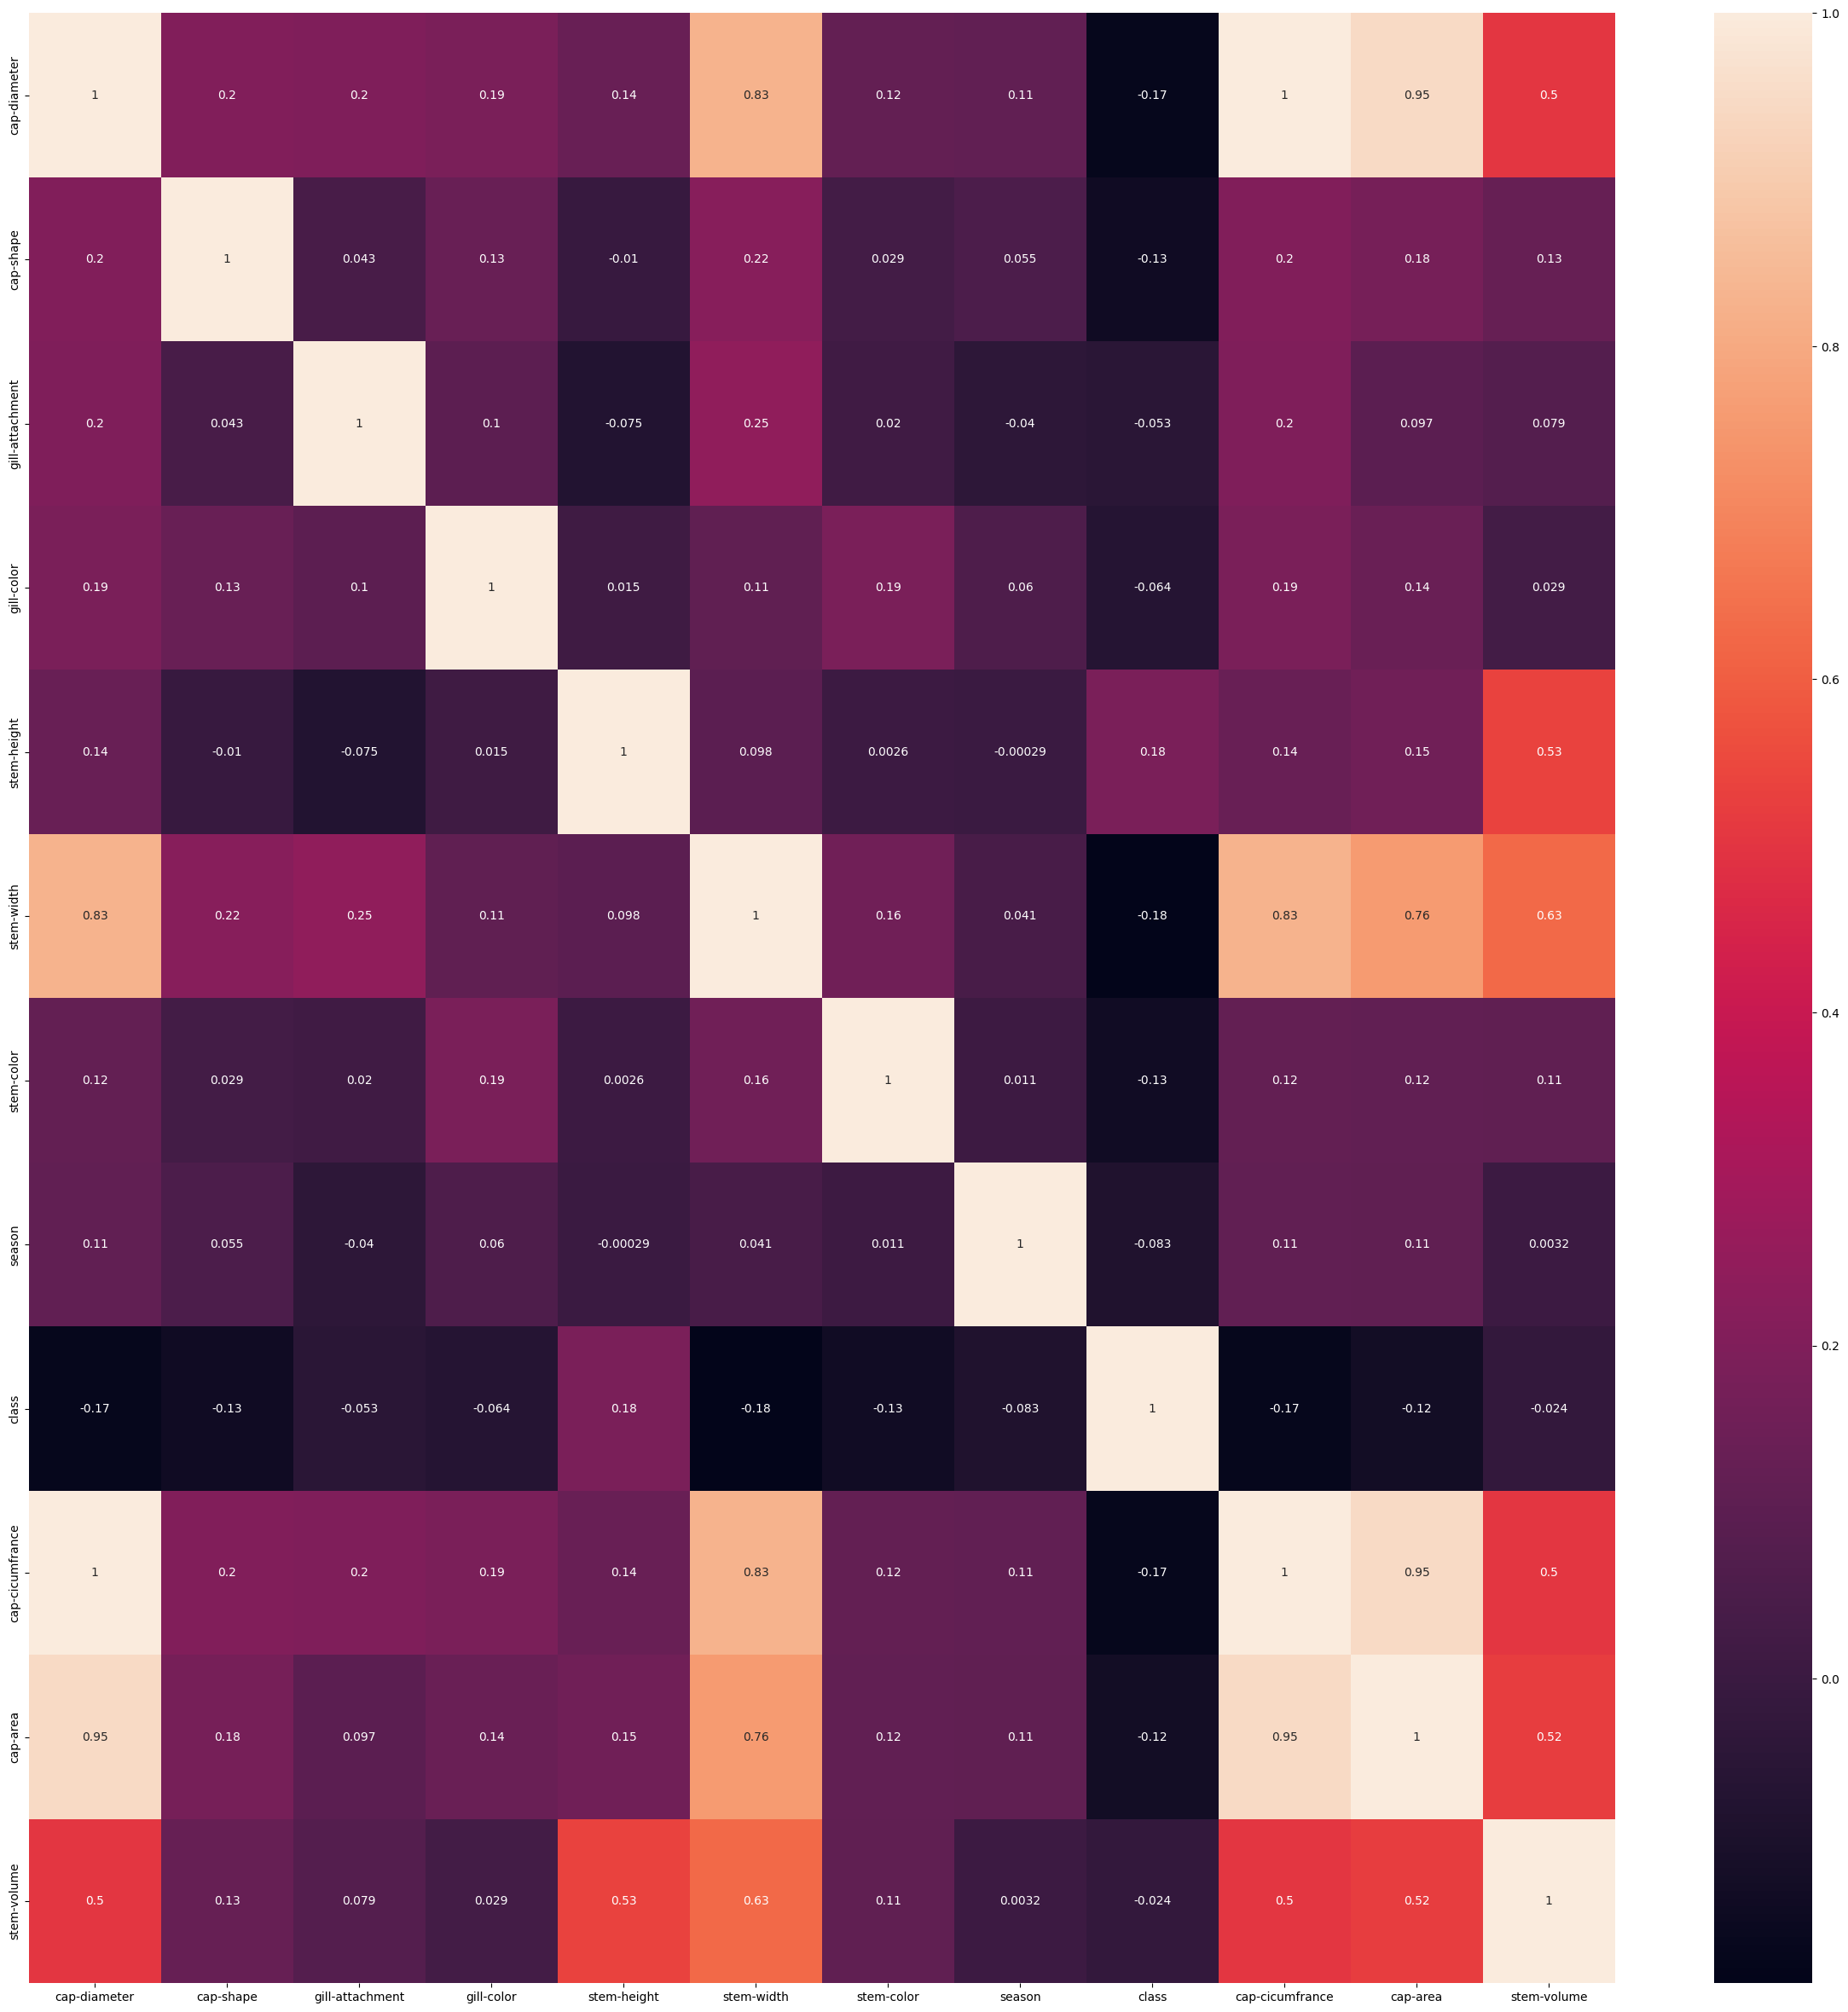

In [26]:
plt.subplots(figsize = (30,30))
sns.heatmap(data.corr(), annot = True)
plt.show()

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import HistGradientBoostingClassifier

In [28]:
y = data['class']
data.drop('class', axis = 1, inplace = True)
X = data

In [29]:
xtrain, xtest, ytrain, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [30]:
model = LogisticRegression() #63.8%
model.fit(xtrain, ytrain)

LogisticRegression()

In [31]:
knc = KNeighborsClassifier(n_neighbors=12)
knc.fit(xtrain, ytrain) #92.1%

KNeighborsClassifier(n_neighbors=12)

In [36]:
rfc = RandomForestClassifier()
rfc.fit(xtrain,ytrain) #86.%

RandomForestClassifier()

In [37]:
logp=rfc.predict(xtest)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8065
           1       0.99      0.99      0.99      9767

    accuracy                           0.99     17832
   macro avg       0.99      0.99      0.99     17832
weighted avg       0.99      0.99      0.99     17832

 ROC-AUC Score: 0.9873
 Accuracy Score: 0.9874
 Recall Score: 0.9883
 Precision Score: 0.9887
 F1-score: 0.9885


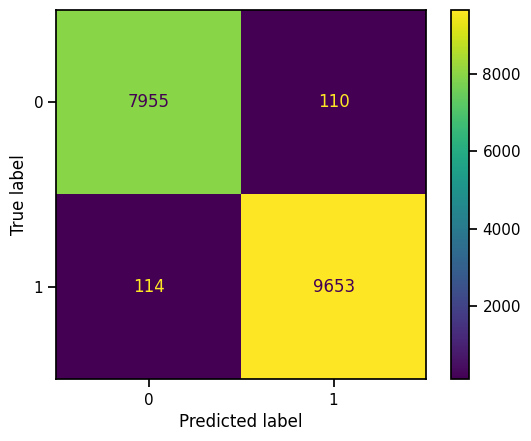

In [38]:
print(classification_report(y_test, logp))
lr_cm = confusion_matrix(y_test, logp)
sns.set_context("notebook")
ConfusionMatrixDisplay(confusion_matrix = lr_cm, display_labels = model.classes_).plot()

roc_auc = round(roc_auc_score(y_test, logp), 4)
accuracy = round(accuracy_score(y_test, logp), 4)
recall = round(recall_score(y_test, logp), 4)
precision = round(precision_score(y_test, logp), 4)
f_one = round(f1_score(y_test, logp), 4)

print(f"=========================")
print(f" ROC-AUC Score: {roc_auc}")
print(f" Accuracy Score: {accuracy}")
print(f" Recall Score: {recall}")
print(f" Precision Score: {precision}")
print(f" F1-score: {f_one}")
print(f"=========================")